# GradientBoostClassifire

## The Data

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

#### Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

----------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

### Selecting Feature

In [5]:
X = pd.get_dummies(df.drop('class',axis=1),drop_first=True)

In [6]:
y = df['class']

### Train | Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=106)

### Making GradientBoosting Classifier Model

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid ={'n_estimators':[50,100],
             'learning_rate':[0.1,0.05,0.2],
             'max_depth':[3,4,5]}

In [13]:
gb_model= GradientBoostingClassifier()

In [14]:
grid = GridSearchCV(gb_model,param_grid=param_grid,cv=10)

In [15]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [17]:
grid.best_estimator_

GradientBoostingClassifier(max_depth=4, n_estimators=50)

In [18]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}

### Evaluation Of Prediction

In [21]:
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay,confusion_matrix

In [29]:
y_predict = grid.predict(X_test)

In [30]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       858
           p       1.00      1.00      1.00       767

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



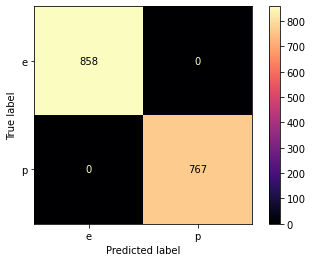

In [31]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test,cmap='magma');

### Checking For Feature Which Affecting Most to The Model

.

In [32]:
grid.best_estimator_.feature_importances_

array([9.76694023e-04, 7.54818554e-17, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.31695090e-04, 2.98291478e-16, 1.41033018e-05,
       0.00000000e+00, 0.00000000e+00, 5.50561233e-17, 0.00000000e+00,
       1.33663745e-17, 0.00000000e+00, 0.00000000e+00, 2.30332560e-06,
       0.00000000e+00, 6.68310466e-02, 0.00000000e+00, 9.42212947e-03,
       2.77550203e-03, 2.53775851e-08, 6.12014796e-01, 1.28237290e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.92530582e-03,
       1.72667674e-03, 0.00000000e+00, 1.96338659e-16, 4.51999055e-18,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.83301332e-17,
       0.00000000e+00, 4.97124830e-16, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.08601884e-04, 1.13871434e-01, 2.59716234e-02,
       3.85547823e-02, 0.00000000e+00, 4.59315761e-03, 1.86298329e-09,
       0.00000000e+00, 3.82970458e-16, 3.35973680e-02, 1.27576500e-08,
       0.00000000e+00, 0.00000000e+00, 4.51878148e-05, 0.00000000e+00,
      

In [58]:
feature = grid.best_estimator_.feature_importances_

In [59]:
imp_fearture = pd.DataFrame(index=X.columns,data=feature,columns=['Importance'])

In [60]:
imp_feature =imp_fearture.sort_values("Importance",ascending=False) 

In [66]:
imp_fearture = imp_fearture[imp_fearture['Importance']>0.0005].sort_values('Importance')

In [67]:
imp_fearture

,Importance
stalk-root_b,0.000509
cap-surface_g,0.000932
cap-shape_c,0.000977
ring-number_t,0.001136
stalk-color-above-ring_w,0.001487
ring-number_o,0.001620
gill-size_n,0.001727
odor_l,0.002776
stalk-surface-above-ring_s,0.004593
gill-spacing_w,0.005925


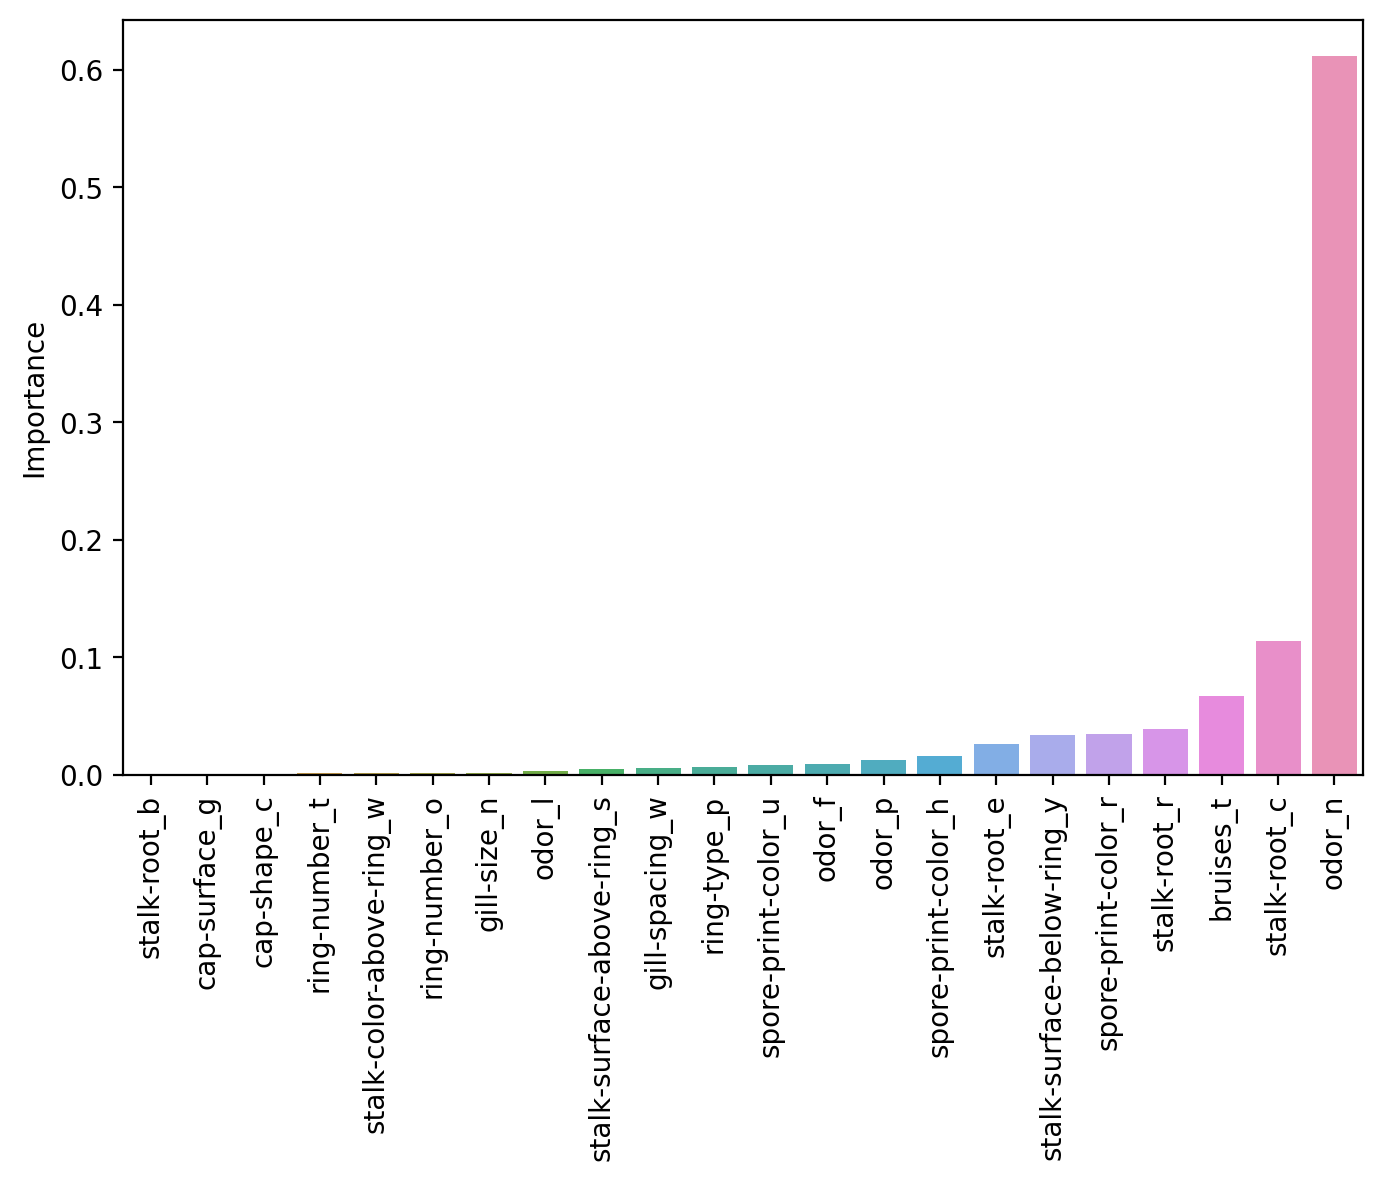

In [72]:
plt.figure(dpi=200,figsize=(8,5))
sns.barplot(data=imp_fearture,x=imp_fearture.index,y='Importance')
plt.xticks(rotation=90);

---------------